In [47]:
#importing some libraies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder , MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, classification_report
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE 
from sklearn.preprocessing import RobustScaler
import plotly.express as px

In [4]:
# Reading data 
df = pd.read_csv(r"C:\users\world\Downloads\train.csv", na_values=[' ?' ])

In [5]:
df['price_range'].unique()

array([1, 2, 3, 0], dtype=int64)

In [6]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [7]:
df.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [8]:
# check data type of each coulmn
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [9]:
# Number of uniques values in dataframe

pd.DataFrame({'': df.nunique().index , 'Number of unique values':  df.nunique().values})

,,Number of unique values
0,battery_power,1094
1,blue,2
2,clock_speed,26
3,dual_sim,2
4,fc,20
5,four_g,2
6,int_memory,63
7,m_dep,10
8,mobile_wt,121
9,n_cores,8


In [10]:
#show unique values for all columns
for col in df.columns.values:
  print(col, end="\n\n")
  print(df[col].unique(), end="\n\n ***********************************\n\n")

battery_power

[ 842 1021  563 ... 1139 1467  858]

 ***********************************

blue

[0 1]

 ***********************************

clock_speed

[2.2 0.5 2.5 1.2 1.7 0.6 2.9 2.8 2.1 1.  0.9 1.1 2.6 1.4 1.6 2.7 1.3 2.3
 2.  1.8 3.  1.5 1.9 2.4 0.8 0.7]

 ***********************************

dual_sim

[0 1]

 ***********************************

fc

[ 1  0  2 13  3  4  5  7 11 12 16  6 15  8  9 10 18 17 14 19]

 ***********************************

four_g

[0 1]

 ***********************************

int_memory

[ 7 53 41 10 44 22 24  9 33 17 52 46 13 23 49 19 39 47 38  8 57 51 21  5
 60 61  6 11 50 34 20 27 42 40 64 14 63 43 16 48 12 55 36 30 45 29 58 25
  3 54 15 37 31 32  4 18  2 56 26 35 59 28 62]

 ***********************************

m_dep

[0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2]

 ***********************************

mobile_wt

[188 136 145 131 141 164 139 187 174  93 182 177 159 198 185 196 121 101
  81 156 199 114 111 132 143  96 200  88 150 107 100 157 160 119  87 15

In [11]:
#Removing spaces from objects data types
df.loc[: , df.dtypes == object].apply(lambda e : e.unique())

Series([], dtype: float64)

In [12]:
for col in df.loc[: , df.dtypes == object].columns:
    df[col] = df[col].str.strip()

In [13]:
df.price_range.unique()

array([1, 2, 3, 0], dtype=int64)

In [14]:
#some statistical information about data 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [15]:
# show first 5 rows 
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [16]:
pd.DataFrame({'h': df.nunique().index , 'null':  df.isnull().sum()})

,h,null
battery_power,battery_power,0
blue,blue,0
clock_speed,clock_speed,0
dual_sim,dual_sim,0
fc,fc,0
four_g,four_g,0
int_memory,int_memory,0
m_dep,m_dep,0
mobile_wt,mobile_wt,0
n_cores,n_cores,0


In [17]:
#check Duplicates
df.duplicated().sum()

0

In [18]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


C:\Users\world\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


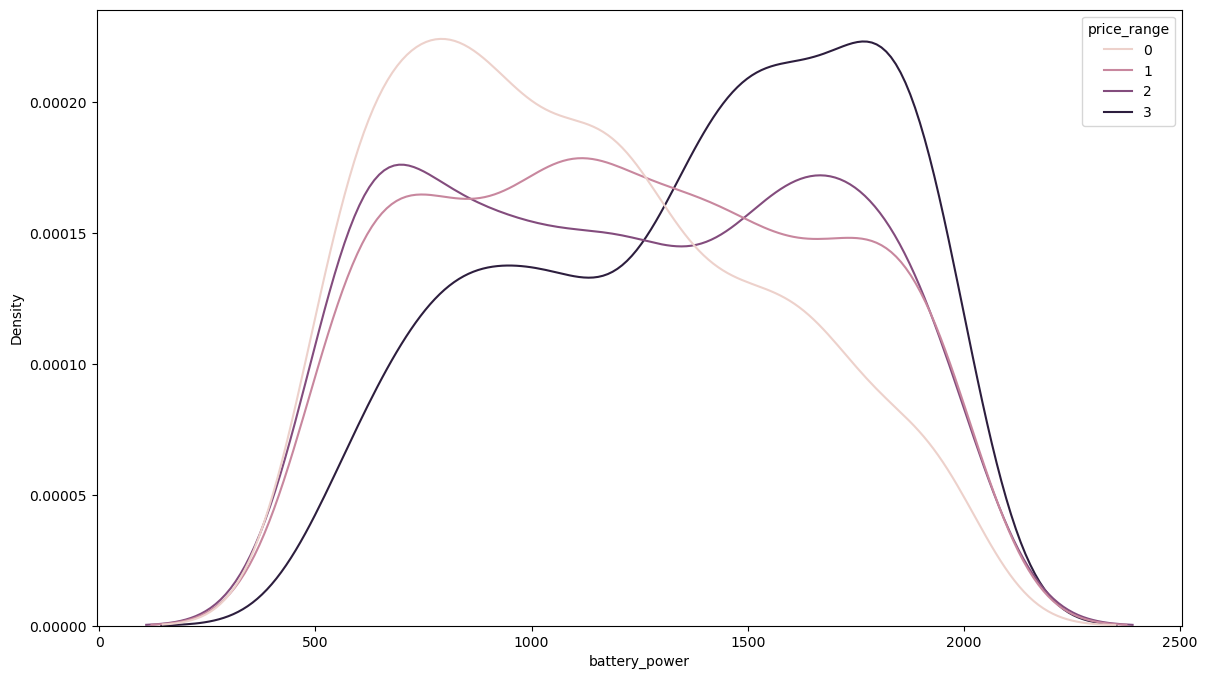

In [19]:
plt.figure(figsize=(14,8))
sns.kdeplot(data = df , x = 'battery_power' ,hue='price_range')
plt.show()

C:\Users\world\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


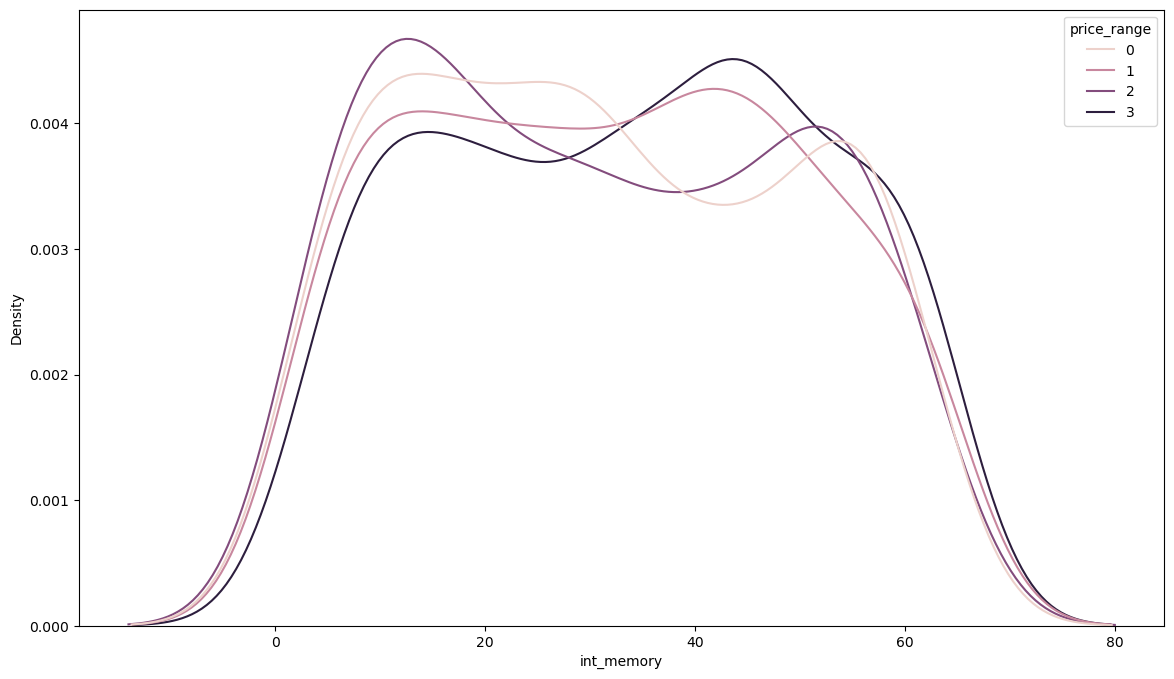

In [20]:
plt.figure(figsize=(14,8))
sns.kdeplot(data = df , x = 'int_memory' ,hue='price_range')
plt.show()

C:\Users\world\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


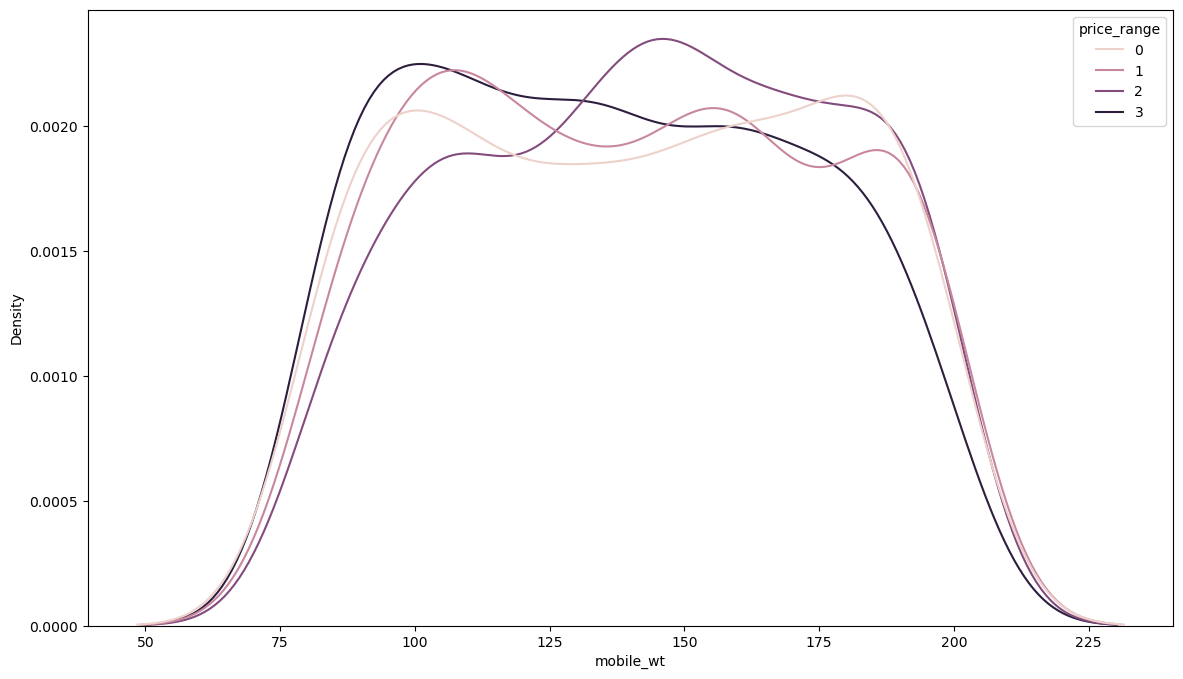

In [21]:
plt.figure(figsize=(14,8))
sns.kdeplot(data = df , x = 'mobile_wt' ,hue='price_range')
plt.show()

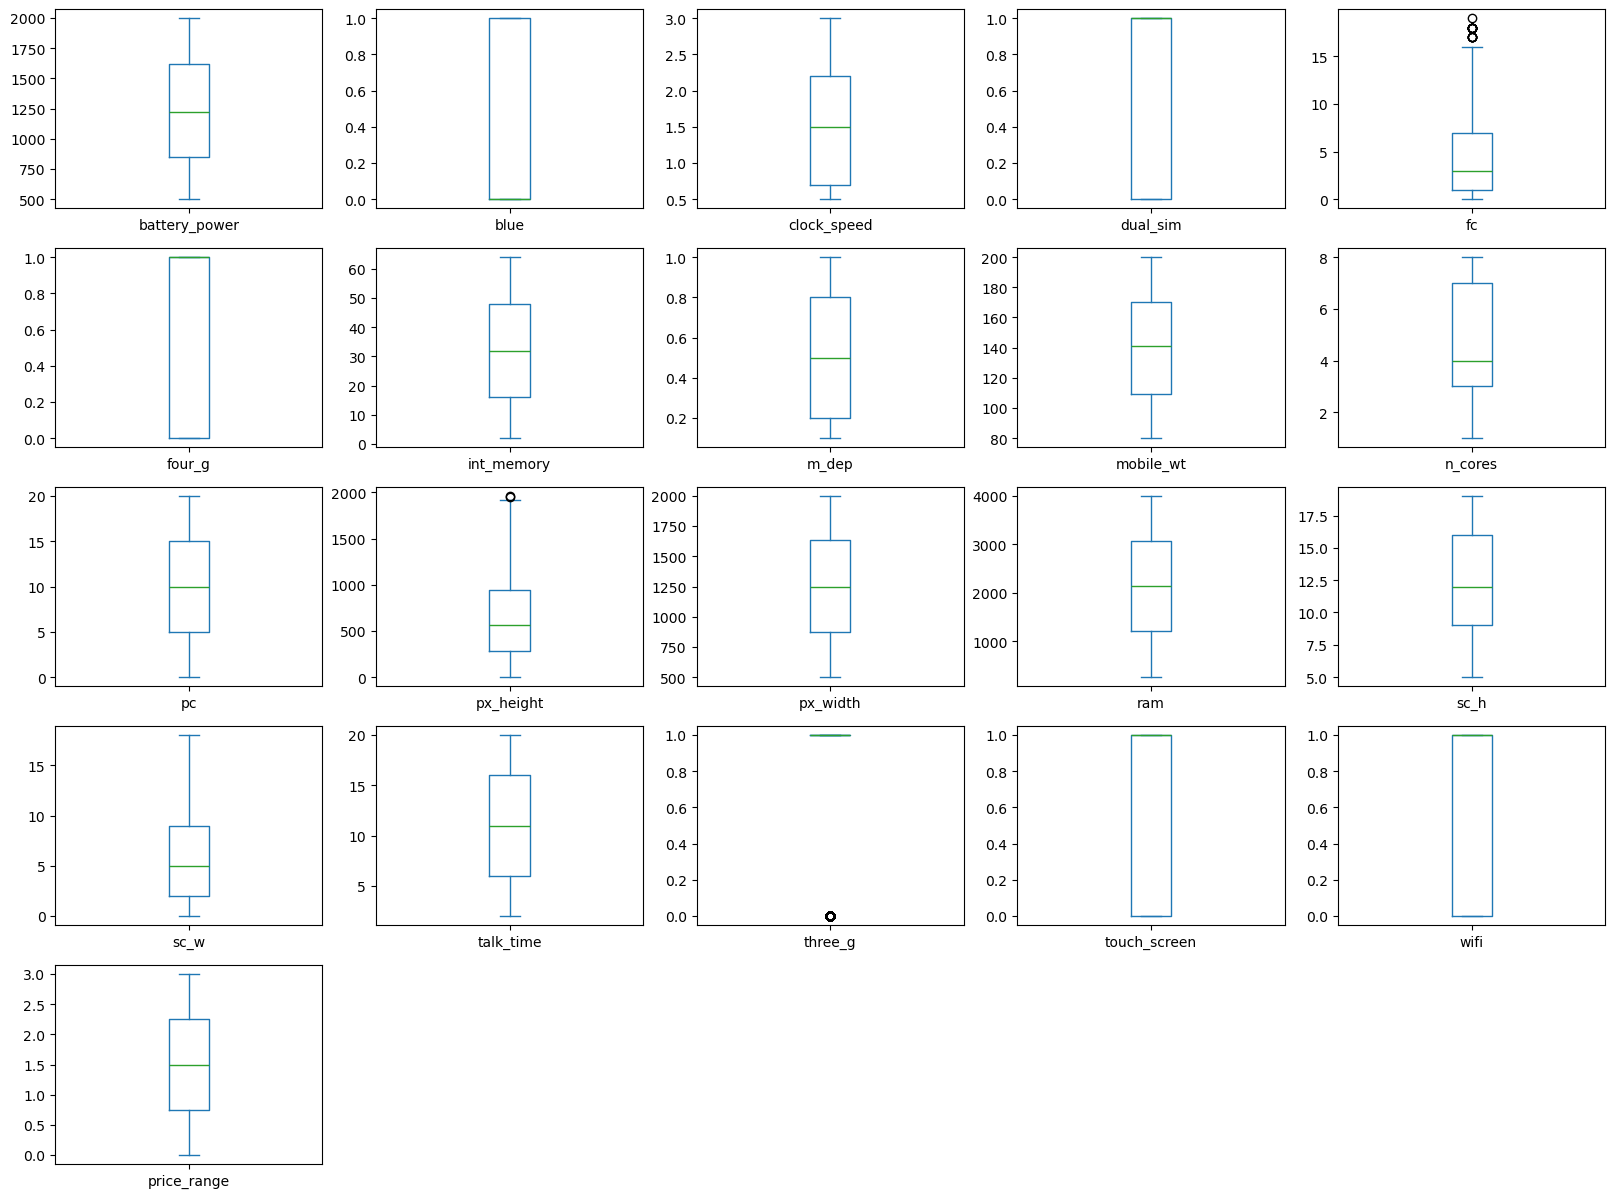

In [46]:
#check outliers
df.plot(kind = "box" , subplots = True , figsize = (20,15) ,  layout = (5,5))
plt.show()

In [22]:
#Feature Selection

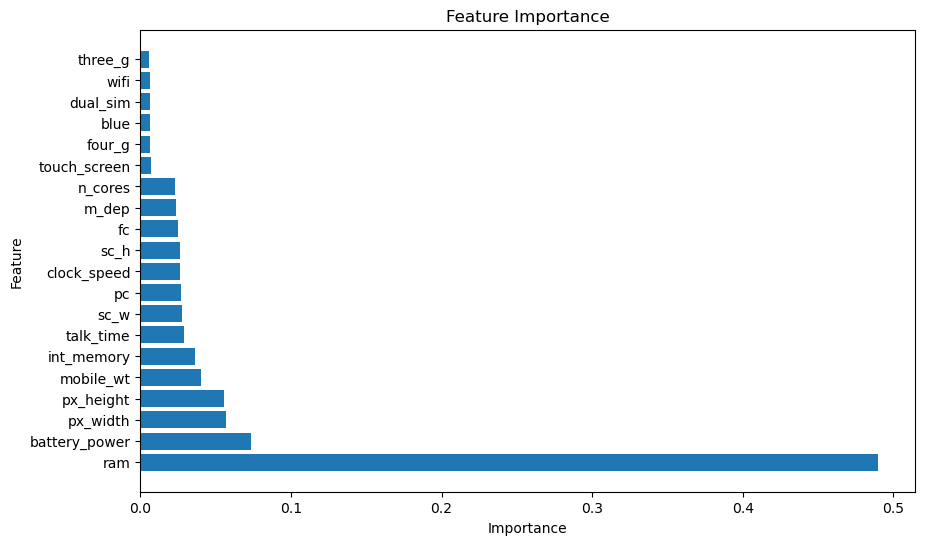

In [25]:
# X should contain all the features except the target variable 'price_range'
X = df.drop('price_range', axis=1)
y = df['price_range']

# Initialize the Random Forest Classifier
rf = RandomForestClassifier()

# Fit the model to the data
rf.fit(X, y)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

# Select the top n most important features
n = 10  # Adjust the number of features you want to select
selected_features = feature_importance_df['Feature'][:n]

# Subset the dataset with the selected features
X_selected = X[selected_features]

In [37]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [38]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [39]:

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [40]:

# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'SVC': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN (k=5)': KNeighborsClassifier(n_neighbors=5),
    'Gradient Booster': GradientBoostingClassifier()
}

In [41]:

# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f"Classifier: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Classification Report:\n{report}")
    print("------------------------------------")

Classifier: Logistic Regression
Accuracy: 0.9750
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       105
           1       0.94      1.00      0.97        91
           2       0.99      0.95      0.97        92
           3       0.97      0.99      0.98       112

    accuracy                           0.97       400
   macro avg       0.98      0.97      0.97       400
weighted avg       0.98      0.97      0.98       400

------------------------------------
Classifier: SVC
Accuracy: 0.8925
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       105
           1       0.80      0.89      0.84        91
           2       0.84      0.82      0.83        92
           3       0.96      0.92      0.94       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0

In [45]:
#done